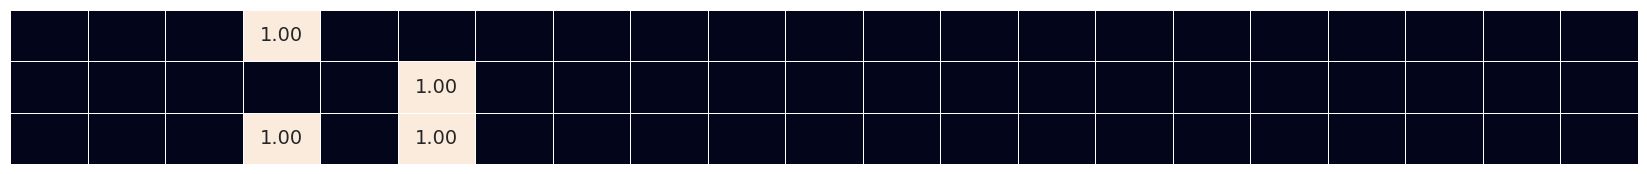

In [1]:
from jaxcmr_research.models.context import TemporalContext
from jax import numpy as jnp, lax
from jaxcmr_research.helpers.math import linalg_norm
import matplotlib.pyplot as plt
from jaxcmr_research.state_analysis import matrix_heatmap, instance_memory_heatmap

drift_rate = 0.3
item_count = 10
context = TemporalContext.init_expanded_context(item_count)
first_context_input = jnp.zeros(10+10+1).at[3].set(1)
second_context_input = jnp.zeros(10+10+1).at[5].set(1)
combo_context_input = jnp.zeros(10+10+1).at[3].set(1).at[5].set(1)
context_inputs = jnp.array([first_context_input, second_context_input, combo_context_input])

matrix_heatmap(context_inputs, figsize=(21, 2))
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])

# remove the colorbar
axis = plt.gca()
# remove the colorbar
cax = axis.collections[0].colorbar
cax.remove()


In [2]:
context.integrate(first_context_input, drift_rate).state

Array([0.9539392, 0.       , 0.       , 0.3      , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       ], dtype=float32)

In [3]:
context.integrate(first_context_input, drift_rate/2).integrate(second_context_input, drift_rate/2).state

Array([0.97749996, 0.        , 0.        , 0.1483029 , 0.        ,
       0.15      , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

In [4]:
context.integrate(combo_context_input, drift_rate).state

Array([0.9539392 , 0.        , 0.        , 0.21213204, 0.        ,
       0.21213204, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

In [5]:
context.integrate(first_context_input + second_context_input, drift_rate).state

Array([0.9539392 , 0.        , 0.        , 0.21213204, 0.        ,
       0.21213204, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

In [6]:
context.integrate(.01* first_context_input + second_context_input, drift_rate).state

Array([0.9539392 , 0.        , 0.        , 0.00299985, 0.        ,
       0.299985  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

In [7]:
context.integrate(first_context_input + .01 * second_context_input, drift_rate).state

Array([0.9539392 , 0.        , 0.        , 0.299985  , 0.        ,
       0.00299985, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
jnp.eye(item_count, size, self.next_outlist_unit)

So there's a clear difference between two integrations of separate representations with half drift rate than a single integration of a combined representation. A combined integration is probably faster and more accurate.

Most straightforward mechanism is to drift toward a mix of outlist context and context_input, modulating the ratio using a scalar parameter between 0 and 1. The actual drift rate should remain consistent with the trial-level encoding drift rate.